<a href="https://colab.research.google.com/github/EugeniaArrietaRodriguez/DS4A/blob/master/1_ML_en_investigaci%C3%B3n_en_Salud_Obtenci%C3%B3n%2C_Limpieza_y_Exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Machine Learning en Salud - Diabetes (Parte 1 de 2)

El objetivo principal de Machine Learning (ML) es predecir o describir el comportamiento de elementos medibles de la realidad a partir de información incompleta e incierta.

Las condiciones de información incompleta e incierta hacen que modelos de las ciencias naturales no sean aplicables. Por eso gran parte de los métodos de ML estarán basados en intuiciones estadísticas y métodos computacionales.

La correlación de variables debe ser guiada por expertos, los cuales determinan, desde el punto de vista científico, el soporte de una relación entre variables. Esto es fundamental, dado que para la máquina, una variable es solo un número. 

En este primera parte del taller, vamos a obtener los datos, limpiarlos, examinarlos, modelarlos y generar un dataset adecuado para que los algoritmos de aprendizaje de máquinas puedan aprender y predecir.

## Cadena de procesos en ML - O.S.E.M.N.
* O - Obtaining; Obtener datos
* S - Scrubbing; Limpiar los datos
* E - Exploring; Visualizar los datos para encontrar patrones y relaciones. *Muchas veces este paso es transversal, en especial con (S)*
* M - Modeling; Modelar los datos para predecir o describir un comportamiento
* N - INterpreting; Interpretar los resultados de los modelos

![](https://miro.medium.com/max/3870/1*eE8DP4biqtaIK3aIy1S2zA.png)


### *En este notebook vamos a indagar en los metodos de obtener los datos, limpiarlos y explorarlos, usando las librerias para python; `pandas` y `seaborn`.*

## Transfondo del Caso - Diabetes
Antes de empezar los procesos de cargar de datos, limipeza/pre-procesamiento y exploración hay que tener claro el transfondo de la problematica, la tarea que se requiere realizar por la maquina de aprendizaje automático y la información sobre los datos crudos o sin procesar.

### PIMA Indians Diabetes 
**Dataset:**
Los Pima (o Akimel O'odham; "Gente del Río", anteriormente conocido como Pima) son un grupo de nativos americanos que viven en un área que consiste en lo que ahora es el centro y sur de Arizona.

Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente de esta comunidad tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Dentro de ciertas restricciones a los datos por parte del instituto, todos los pacientes aquí son mujeres de al menos 21 años de la comunidad Pima.



**Diabetes:** es un grupo de trastornos metabólicos en los que hay niveles altos de azúcar en la sangre durante un período prolongado. Los síntomas de un nivel alto de azúcar en la sangre incluyen orina frecuente, aumento de la sed y aumento del hambre. Si no se trata, la diabetes puede causar muchas complicaciones graves, como enfermedad cardiovascular, accidente cerebrovascular, enfermedad renal crónica, úlceras en los pies, daño a los ojos y muerte.

**Estadisticas mundiales sobre Diabetes:**
![](http://everydaydiabetes.com/wp-content/uploads/Diabetes-Statistics-Worldwide-Everyday-Diabetes.jpg)

In [ ]:
# Librerias necesarias
# Gestion de datos
import numpy as np
import pandas as pd
import seaborn as sns

# Tratamiento de datos
import sklearn.preprocessing as preprocessing

# Visualización - Graficas
import matplotlib.pyplot as plt
import missingno as msno
from mlxtend.plotting import plot_decision_regions
from IPython.display import display

# Valores iniciales
import warnings
warnings.filterwarnings('ignore') # Ignorar advertencias
%matplotlib inline
sns.set()

## Obtaining: Obtención de Datos

El conjunto de datos puede ser obtenido desde la pagina de **<br/> [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)**, en el mismo se hace una explicación breve sobre su contexto y composición, dicha información resumida es la siguiente:

### Información de datos crudos:


Los datos consisten en varias variables predictoras o caracteristicas y una variable objetivo, **Outcome**. Los predictores incluyen el numero de embarazos que ha tenido el paciente, su IMC, nivel de insulina, edad, entre otros.

* **Pregnancies**: Numero de embarazos que ha tenido
* **Glucose**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa
* **BloodPressure**: Tensión arterial diastólica (mm Hg)
* **SkinThickness**: Grosor del pliegue de la piel del tríceps (mm)
* **Insulin**: Insulina sérica a 2 horas (mu U/ml)
* **BMI**: Indice de masa corporal (IMC) (peso en kg/(altura in m)^2)
* **DiabetesPedigreeFunction**: Función de pedigrí de la diabetes o antecedentes familiares
* **Age**: Edad (años)

In [ ]:
# Cargar los datos
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/acely-dev/diabetes_python/master/diabetes.csv')

# Imprimir y visualizar las primeras columnas (5 por defecto)
display(diabetes_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

## Scrubbing: Análisis estadístico básico y Preprocesamiento

**Pandas:Dataframe.info**: Da información acerca del tipo de datos en las diferentes columnas, el numero de valores nulos, uso de memoria, entre otros.

In [ ]:
## General info
display(diabetes_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

**Pandas:DataFrame.describe** Genera una serie de estadisticas descriptivas que resumen la tendencia, dispersión y tamaño en la distribución de los datos. Especificamente, el metodo solo trabaja con datos o columnas del tipo numerico, de encontrarse una columna categorica en los datos, el metodo la ignora.

Las estadisticas descriptivas son las siguientes:
* count: cantidad de filas por columna, descontando datos nulos.
* mean: valor medio de la columna.
* std: desviación estandar de la columna.
* min: valor minimo de la columna.
* 25%, 50%, and 75%: valores en los percentiles.
* max: valor maximo de la columna.

In [ ]:
## Detalles estadisticos basicos
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Análisis sobre destalles estadísticos

- ¿Por qué  hay valores mínimos de cero (0) en algunas variables, tiene sentido?
- ¿Los demás estadisticos, media y máximo tienen sentido para esa variable clínica?

#### Los valores con ceros son erroneos, y por lo tanto necesitan ser tratados para que no generen ruido en los modelos, para tratarlos comúnmente se puede:
- **Remplazar por nulo**: Al cambiar los valores a nulos simplemente los consideramos ruido y los estariamos eliminando del conjunto de datos, ya no contariamos con aquella fila (Paciente) que contenga algun valor en nulo
- **Imputar el valor**: Se remplaza el valor en cero (o que en el contexto del problema se considere como erroneo, incluso nulos) por algún valor aproximado que tenga sentido, este valor aproximado puede ser calculado a partir de una función única que diseñemos, que dependa de otros valores (ya sean del mismo paciente (fila) o de si mismo a partir de los demas pacientes (columna), o incluso las dos formas unidas.

#### En este caso vamos a imputar el valor a partir de los datos que se tienen sobre ese mismo predictor (columna), asignandole el valor medio mas indicado (las función seria la media, moda o medinana, dependiendo de su distribución)
**1. Tener claro el número de valores erroneos (en cero o nulo)**

In [ ]:
diabetes_data_scrubbed = diabetes_data.copy(deep = True)
diabetes_data_scrubbed[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_scrubbed[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## Numero de valores nulos, que no aportan
print(diabetes_data_scrubbed.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**2. Para imputar estos valores erroneos a partir de los valores de su mismo tipo o predictor (columna), es necesario entender como estan distribuidos**

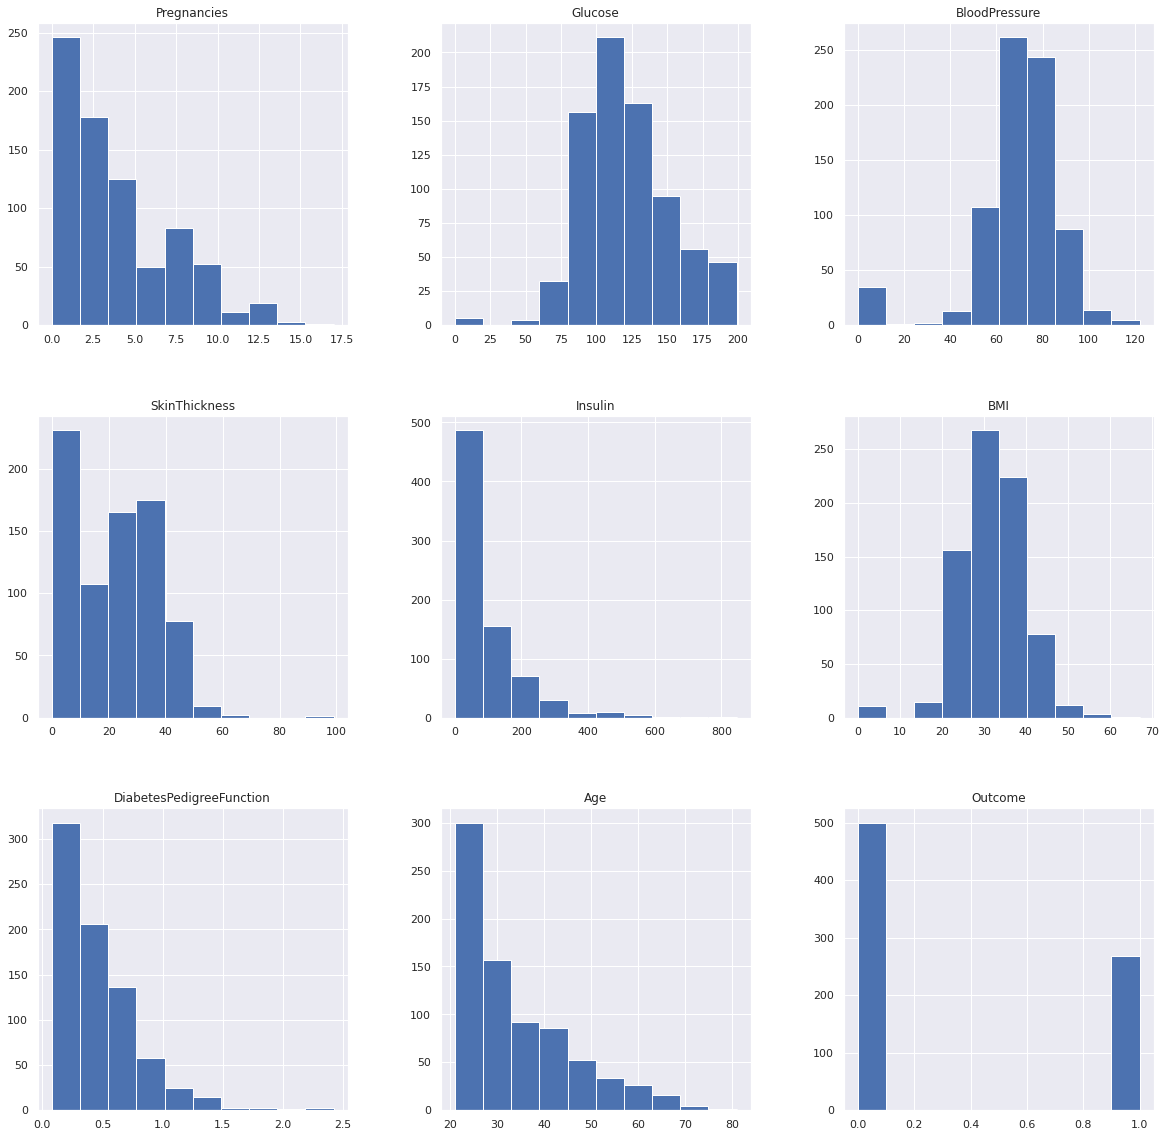

In [ ]:
# Histograma: distribución de los datos por cantidades
p = diabetes_data.hist(figsize = (20,20))

**3. Imputar cada variable con valores erroneos (nulos) con un valor medio, dependiendo de la distribución**

#### Asimetría estadística

Dependiendo del tipo de distribución de los datos, se debería escoger el mejor valor medio (Media: X, Mediana: Me, Moda: Mo) basados en la presencia de asimetría y donde estan presentes los datos erroneos que se van a cambiar

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Posiciones_relativas_de_par%C3%A1metros_centrales.svg/600px-Posiciones_relativas_de_par%C3%A1metros_centrales.svg.png)

In [ ]:
diabetes_data_scrubbed['Glucose'].fillna(diabetes_data_scrubbed['Glucose'].mean(), inplace = True)
diabetes_data_scrubbed['BloodPressure'].fillna(diabetes_data_scrubbed['BloodPressure'].mean(), inplace = True)
diabetes_data_scrubbed['SkinThickness'].fillna(diabetes_data_scrubbed['SkinThickness'].median(), inplace = True)
diabetes_data_scrubbed['Insulin'].fillna(diabetes_data_scrubbed['Insulin'].median(), inplace = True)
diabetes_data_scrubbed['BMI'].fillna(diabetes_data_scrubbed['BMI'].median(), inplace = True)

**4. Comprobar nueva distribución**

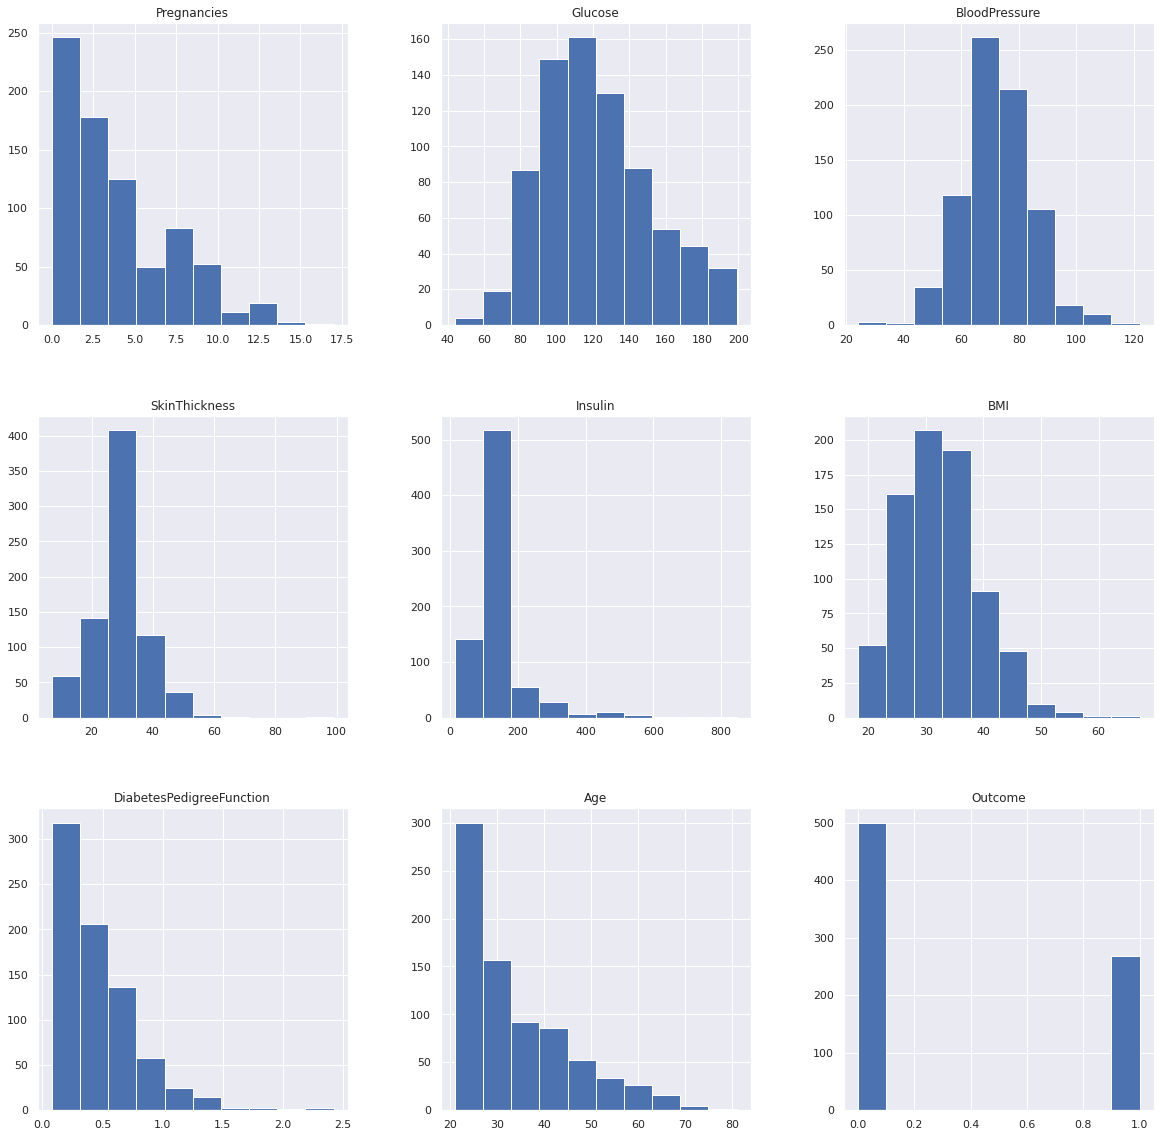

In [ ]:
# Histograma: distribución de los datos por cantidades
p = diabetes_data_scrubbed.hist(figsize = (20,20))

### Tamaño de los datos

**Pandas:Dataframe.shape**: Muestra el tamaño y dimensión de los datos (#filas, #columnas)

In [ ]:
## tamaño y dimensión de los datos
diabetes_data_scrubbed.shape

(768, 9)

### Disposición y Balance en los datos

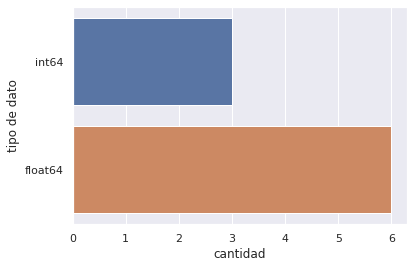

In [ ]:
## distribución y balance en el tipo de datos
sns.countplot(y=diabetes_data_scrubbed.dtypes.map(str))
plt.xlabel("cantidad")
plt.ylabel("tipo de dato")
plt.show()

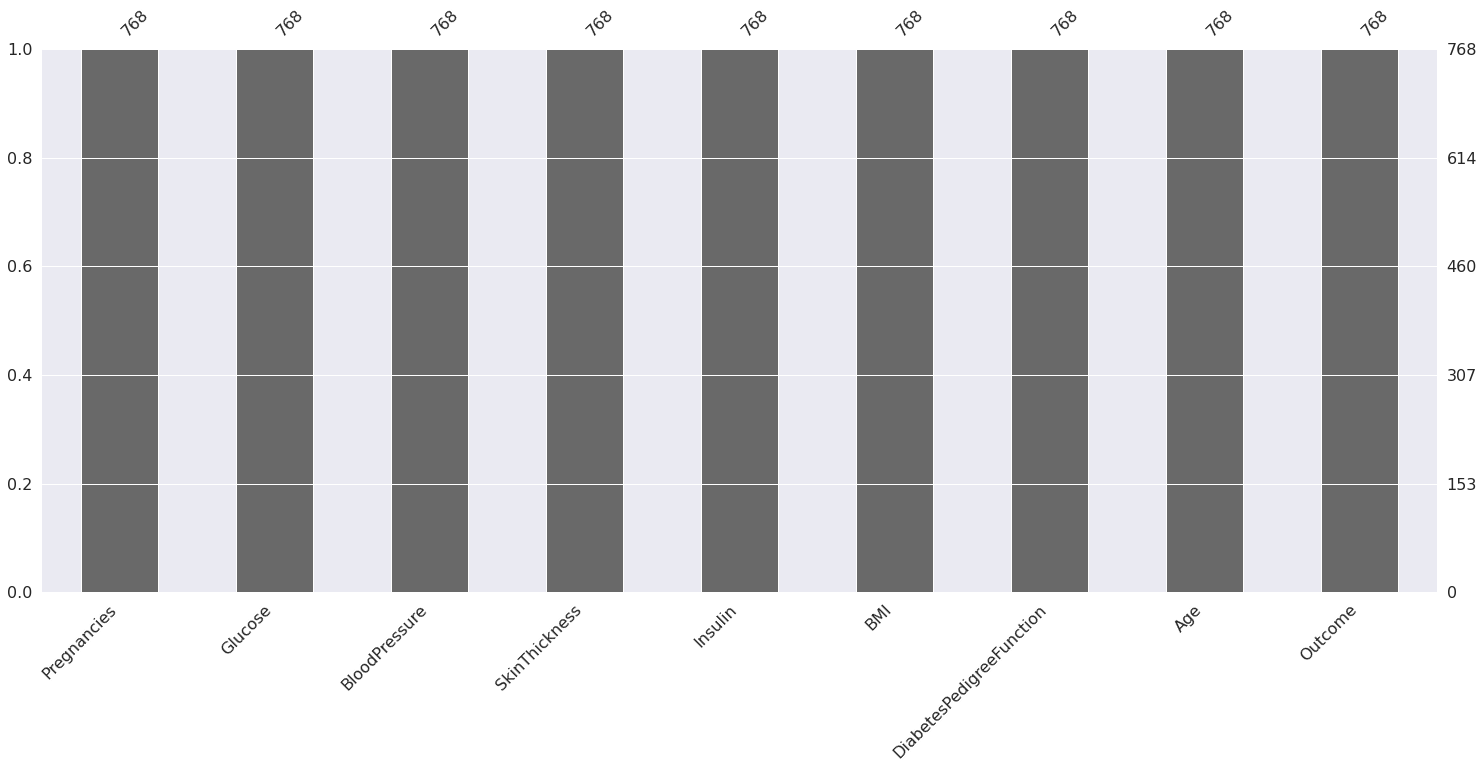

In [ ]:
## Analisis de valores nulos
p = msno.bar(diabetes_data_scrubbed)

#### El siguiente gráfico tiene como objeto ver la distribución en los datos en la variable objetivo, esto para validar que no exista un sesgo a la hora de entrenar los modelos.

#### Como resultado, se puede ver que los datos están sesgados hacia el valor 0, lo que significa que el número de no diabéticos es casi el doble del número de pacientes diabéticos.

0    500
1    268
Name: Outcome, dtype: int64


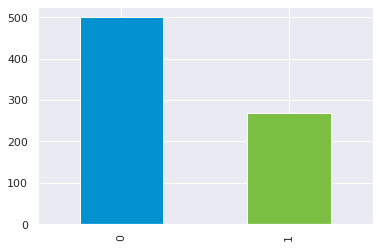

In [ ]:
## distribución y balance de la varaible objetivo
print(diabetes_data.Outcome.value_counts())
p = diabetes_data_scrubbed.Outcome.value_counts().plot(kind="bar", color=["#0392cf", "#7bc043"])

**Matriz de dispersión:** Como su nombre lo indica, muestra la dispersión de los datos a dos dimensiones comparando dos variables/predictores. Con el objetivo de detectar si existe o no relación entre las dos variables.

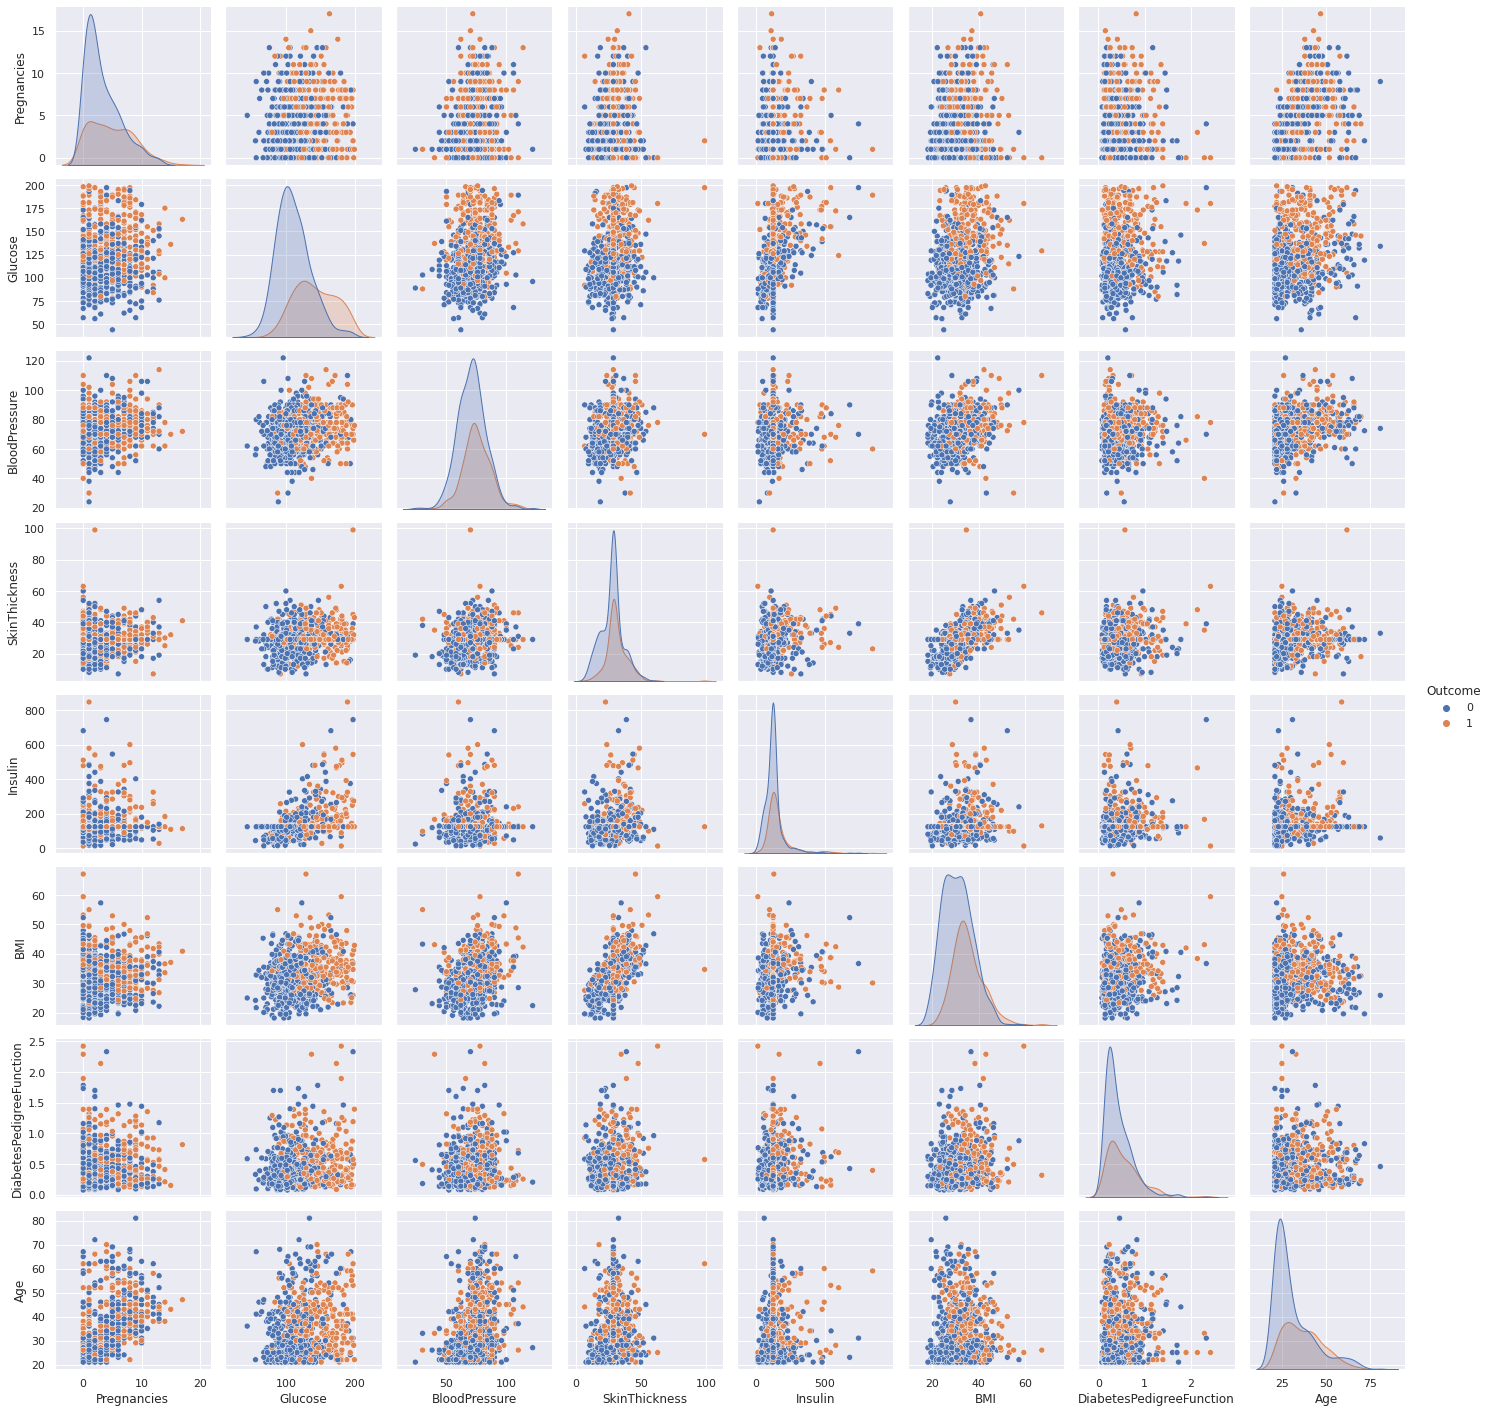

In [ ]:
p=sns.pairplot(diabetes_data_scrubbed, hue = 'Outcome')

**Correlacción :**: Ayuda a identificar la relación (lineal) entre dos variables. El valor del *coeficiente de correlación de Pearson* puede estar entre -1 y +1. +1/-1 significa que están altamente correlacionados inversamente o proporcionalmente y 0 significa que no hay correlación..

Para identificar dicha correlación de la manera mas grafica se usa un ***Mapa de Calor (Heatmap)***. Este mapa es una representación en dos dimensiones con el valor exacto de correlación entre dos variables y con una variación en el color indicando la intensidad.

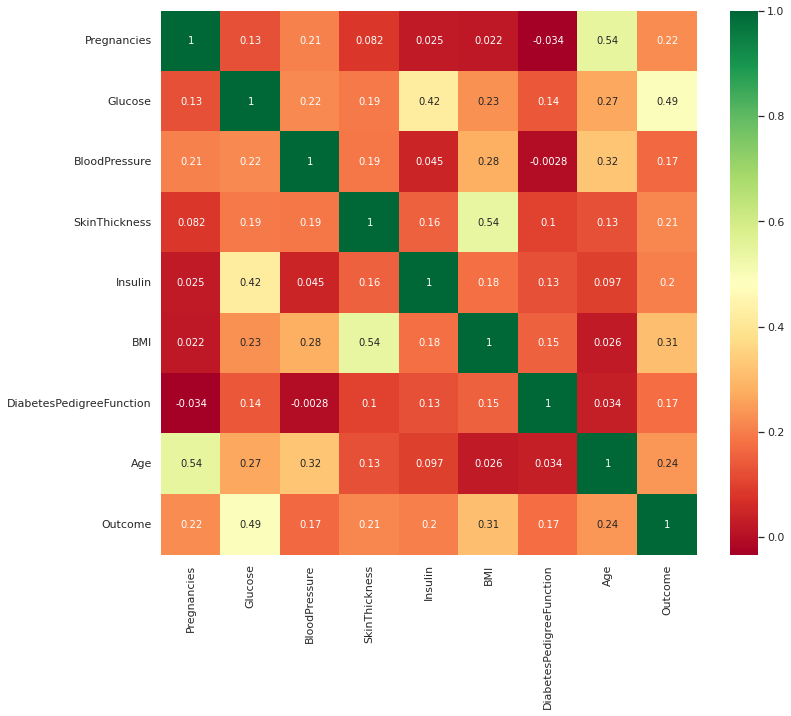

In [ ]:
plt.figure(figsize=(12,10))  # Ajustar el tamaño de la figura (width,height).
p=sns.heatmap(diabetes_data_scrubbed.corr(), annot=True,cmap ='RdYlGn') # Mapa de calor de seaborn

### Transformación: Normalización y estandarización de los datos

Dentro de los procesos finales de limpieza y analisis de datos, se encuentra la transformación de los datos.

Los datos preprocesados o filtrados por todos los procesos que hemos realizado hasta ahora pueden contener variables/predictores con una mezcla de escalas para varias cantidades numericas, como dólares, kilogramos y volumen de ventas.

Varios métodos de aprendizaje automático son más efectivos si los todos los datos que le ingresan tienen la misma escala con respecto a todos los predictores. Dos métodos populares de escalado de datos son la normalización y la estandarización.

- **Normalización:** reescala variables numéricas de valor real al rango 0 y 1. *Normalmente es útil normalizar los datos para un modelo que donde sus calculos se basan en la magnitud de los valores, como los calculos de distancia (euclidiana o manhattan) utilizadas en K-nn (K-vecinos cercanos) y en los coeficientes la regresión*.

- **Estandarización:** Se refiere al desplazamiento de la distribución de cada atributo para tener una media de cero y una desviación estándar de uno. *Normalmente es útil estandarizar los datos para un modelo que se basa en la distribución de variables como los procesos gaussianos*.

***En nuestro caso, vamos a aplicar los dos métodos y ver como se comportan cada uno mas adelante***

In [ ]:
normalizer = preprocessing.Normalizer()
scaler = preprocessing.StandardScaler()

X_norm = normalizer.transform(diabetes_data_scrubbed.drop(["Outcome"],axis = 1))
X_sc = scaler.fit_transform(diabetes_data_scrubbed.drop(["Outcome"],axis = 1),)

X_norm =  pd.DataFrame(X_norm,
                     columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                              'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_sc =  pd.DataFrame(X_sc,
                     columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                              'BMI', 'DiabetesPedigreeFunction', 'Age'])
display(X_norm.head())
display(X_sc.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027500,0.678333,0.330000,0.160417,0.572916,0.154000,0.002874,0.229167
1,0.005801,0.493082,0.382863,0.168228,0.725120,0.154306,0.002036,0.179830
2,0.033902,0.775519,0.271220,0.122896,0.529726,0.098741,0.002848,0.135610
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_data_scrubbed.Outcome

In [ ]:
# Guardar los datos preparados para Empezar la etapa de Modelamiento (Entrenamiento)
data_ajustada_sc = X_sc.copy()
data_ajustada_sc['Outcome'] = y

data_ajustada_norm = X_sc.copy()
data_ajustada_norm['Outcome'] = y

data_ajustada_sc.to_csv('data_sc.csv', index=False)
data_ajustada_norm.to_csv('data_norm.csv', index=False)

## Fin etapa de obtención, limpieza y exploración

hasta el momento tenemos un dataset que lo hemos guardado en disco duro, como archivo separado por comas, listo para procesar por nuestros algoritmos de inteligencia artificial. 

¡Vamos a la parte II del taller!
